Chapter 6
# 从时间数据中发现趋势
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader 
import scipy.stats as stats
import pylab

In [2]:
df = pandas_datareader.data.DataReader(['UNRATENSA'], data_source='fred', start='08-01-1950', end='08-01-2021')
df = df.dropna()
df.to_csv('UNRATENSA.csv')
df.to_pickle('UNRATENSA.pkl')

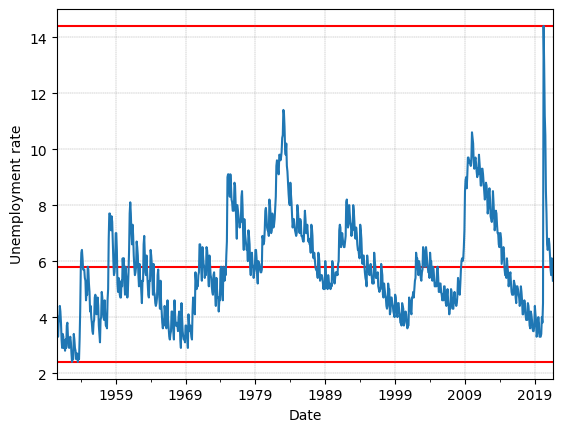

In [3]:
#%% long term trend


average_rate = df['UNRATENSA'].mean()

fig, axs = plt.subplots()

df['UNRATENSA'].plot()

plt.axhline(y=average_rate, color= 'r', zorder=0)
plt.axhline(y=df['UNRATENSA'].max(), color= 'r', zorder=0)
plt.axhline(y=df['UNRATENSA'].min(), color= 'r', zorder=0)
axs.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])

plt.xlabel('Date')
plt.ylabel('Unemployment rate')
plt.show()

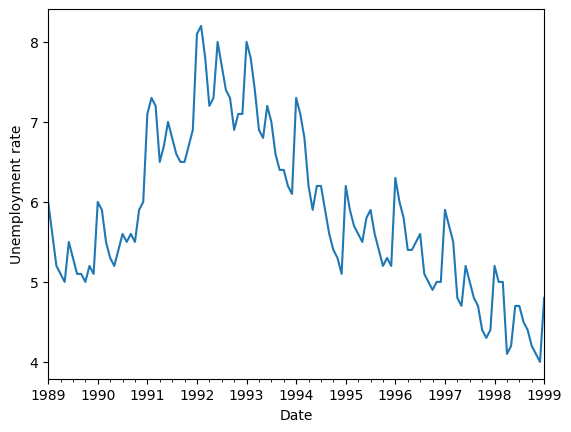

In [4]:
#%% Zoom in

fig, axs = plt.subplots()

df['UNRATENSA']['1989-01-01':'1999-01-01'].plot()
plt.xlabel('Date')
plt.ylabel('Unemployment rate')
plt.show()

axs.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])

In [5]:
#%%
import seaborn as sns

df['year'] = pd.DatetimeIndex(df.index).year

df['month'] = pd.DatetimeIndex(df.index).month
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

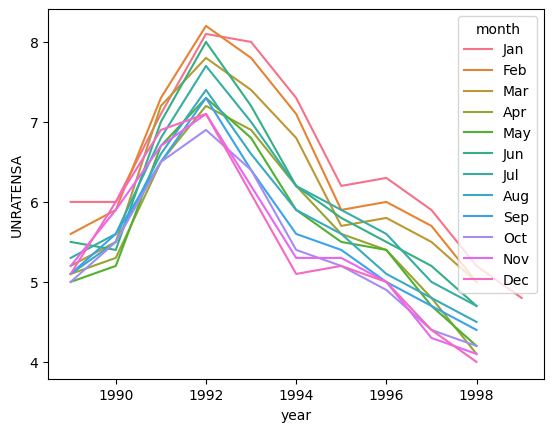

In [6]:
#%%
fig, axs = plt.subplots()

sns.lineplot(data=df['1989-01-01':'1999-01-01'], x="year", y="UNRATENSA", hue="month")
plt.show()

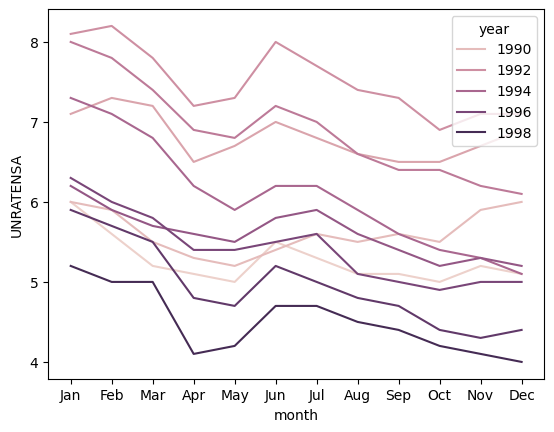

In [7]:
fig, axs = plt.subplots()

sns.lineplot(data=df['1989-01-01':'1999-01-01'], x="month", y="UNRATENSA", hue="year")
plt.show()

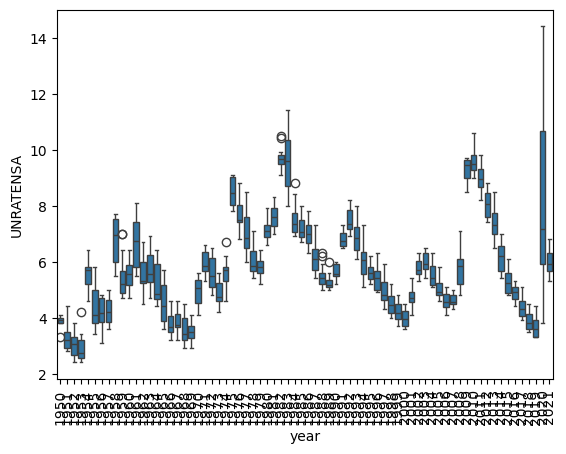

In [8]:
#%%

fig, axs = plt.subplots()

sns.boxplot(x='year', y='UNRATENSA', data=df)
plt.xticks(rotation = 90)
plt.show()

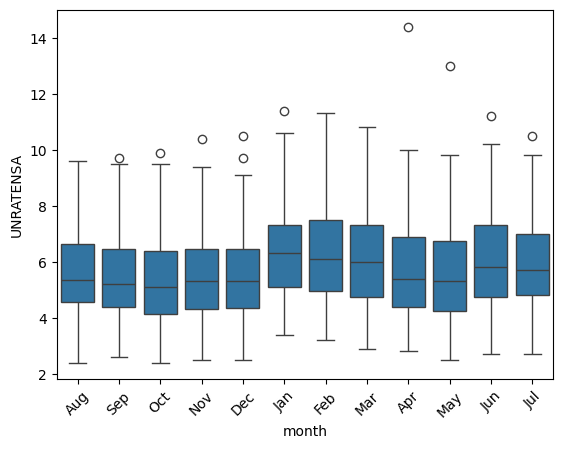

In [9]:
fig, axs = plt.subplots()

sns.boxplot(x='month', y='UNRATENSA', data=df)
plt.xticks(rotation = 45)
plt.show()